In [1]:
# Here are some libraries we will need:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

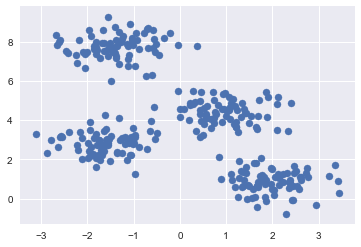

In [2]:
# We will work with a simple example dataset ...
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [3]:
# Application of KMeans is extremely easy ...

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

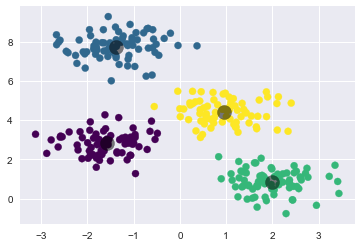

In [4]:
# Here we plot the clusters we found for each data point ...
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [5]:
# The algorithm is actually quite easy to write from scratch ...
# We will need a few tools. We first need to randomly assign
# each data point to a cluster

n_clusters = 4
labels = np.random.randint(n_clusters, size=X.shape[0])
print(labels)


[1 0 2 2 1 3 0 3 1 0 2 2 1 0 3 2 3 2 1 2 2 2 0 3 1 3 1 3 2 3 3 2 2 0 0 3 0
 3 3 0 0 3 2 0 2 2 0 3 3 3 2 0 2 2 1 1 0 1 3 1 2 0 1 0 0 0 0 0 1 2 1 0 3 0
 1 1 2 0 0 0 3 2 0 0 2 0 2 2 1 0 3 1 3 0 3 0 3 0 1 2 3 3 2 1 3 0 1 3 2 2 3
 2 1 3 3 3 3 1 0 3 1 3 2 0 0 3 0 0 3 2 3 1 3 1 1 0 1 0 1 1 3 1 0 3 3 3 0 2
 3 0 0 2 3 1 1 3 0 1 1 2 2 2 3 0 1 2 3 3 1 0 2 3 2 2 0 2 2 0 2 2 3 2 3 1 3
 1 1 2 0 2 0 0 3 2 1 3 2 0 1 0 0 0 0 2 0 3 0 0 3 2 3 0 3 0 3 0 0 0 1 0 3 1
 3 3 0 3 0 1 0 1 1 0 2 2 3 1 3 2 2 1 3 1 3 3 2 3 3 0 2 0 3 3 0 2 3 0 0 3 0
 0 3 3 3 1 0 3 3 2 0 2 1 3 0 1 2 0 0 1 2 2 3 3 3 0 3 1 0 0 2 1 2 0 3 0 0 1
 3 2 2 3]


In [6]:
# Here we compute the initial centers ...

centers = np.array([X[labels == i].mean(0) for i in range(4)])
print(centers)


[[-0.0057496   4.05850552]
 [ 0.38258093  3.23171877]
 [-0.24351202  4.40635972]
 [-0.07632896  4.01560172]]


In [7]:
# This function will compare our data points and assign a new label
# for the nearest center ...
from sklearn.metrics import pairwise_distances_argmin
labels = pairwise_distances_argmin(X, centers)
print(labels)

[1 2 0 2 1 1 1 0 2 2 3 2 0 2 1 0 0 1 3 1 1 1 2 3 3 2 1 0 3 0 2 2 1 2 2 2 2
 2 3 1 1 1 2 1 1 1 2 3 2 1 2 1 2 1 1 1 2 1 2 1 2 0 2 3 3 1 2 1 2 3 0 3 2 3
 1 2 3 0 1 2 1 0 1 1 2 2 1 2 2 2 0 1 2 3 3 1 1 1 2 2 2 1 2 1 0 1 1 0 2 2 1
 3 1 2 1 1 2 1 1 2 1 1 3 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 2 2 3 1 2 0 1 2 0
 2 2 2 0 2 2 1 1 2 1 1 0 2 0 0 1 0 3 1 2 1 1 1 2 1 0 2 2 1 1 0 3 1 1 3 3 2
 0 2 0 1 2 1 1 0 0 1 1 3 1 1 2 1 3 1 1 1 2 3 2 0 2 0 3 2 0 2 1 1 1 1 0 2 1
 1 2 1 3 1 2 2 0 0 2 1 1 3 0 1 3 2 3 1 2 1 2 2 2 2 3 3 2 0 3 1 0 3 2 3 1 1
 2 0 2 2 1 2 3 1 2 2 1 1 3 3 1 1 1 1 0 2 2 1 1 1 1 1 1 2 3 2 1 1 1 2 2 2 1
 1 0 2 3]


In [8]:
# now all we need to do is iterate ...

def find_clusters(X, n_clusters):
    labels = np.random.randint(n_clusters, size=X.shape[0])
    centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels
    

In [9]:
centers, labels = find_clusters(X, 4)

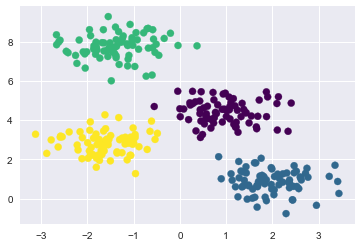

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

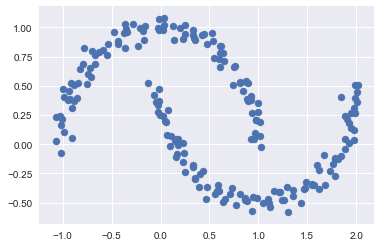

In [11]:
# It is not hard to confuse this algorithm ...
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.show()

In [12]:
centers, labels = find_clusters(X, 2)

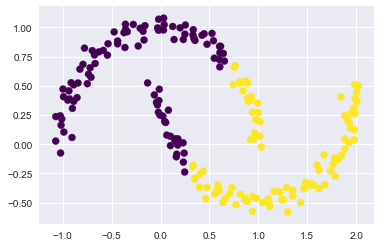

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

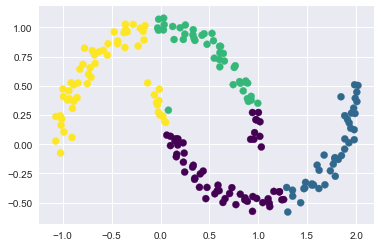

In [14]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()

C:\Users\wjs130130\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


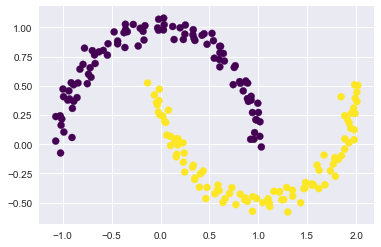

In [15]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()